## Load libraries

In [2]:
library(tidyverse)
library(AnomalyDetection)
library(anomalize)

## Load Data

In [3]:
df = read.csv("/Users/feiwang/Desktop/working/r/NYCHA_TS.csv")
df = df[, c('Building_Meter', 'Month', 'Imputed_KWH')]

In [10]:
tb = read_csv("/Users/feiwang/Desktop/working/r/NYCHA_TS.csv")
tb = select(tb, c('Building_Meter', 'Month', 'Imputed_KWH'))

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  Building_Meter = col_character(),
  Month = col_date(format = ""),
  Month_Type = col_character(),
  `Month_#_Days` = col_double(),
  Prorated_Days = col_double(),
  Gap_Days = col_double(),
  Gap_Type = col_character(),
  Prorated_KWH = col_double(),
  Imputed_KWH = col_double()
)


## Testing Twitter's AnomalyDetection package

In [4]:
ts = select(filter(df, Building_Meter == '165.0 - BLD 03_90327795'), 'Month', 'Imputed_KWH')
ts$Month = as.POSIXct(as.character(ts$Month))

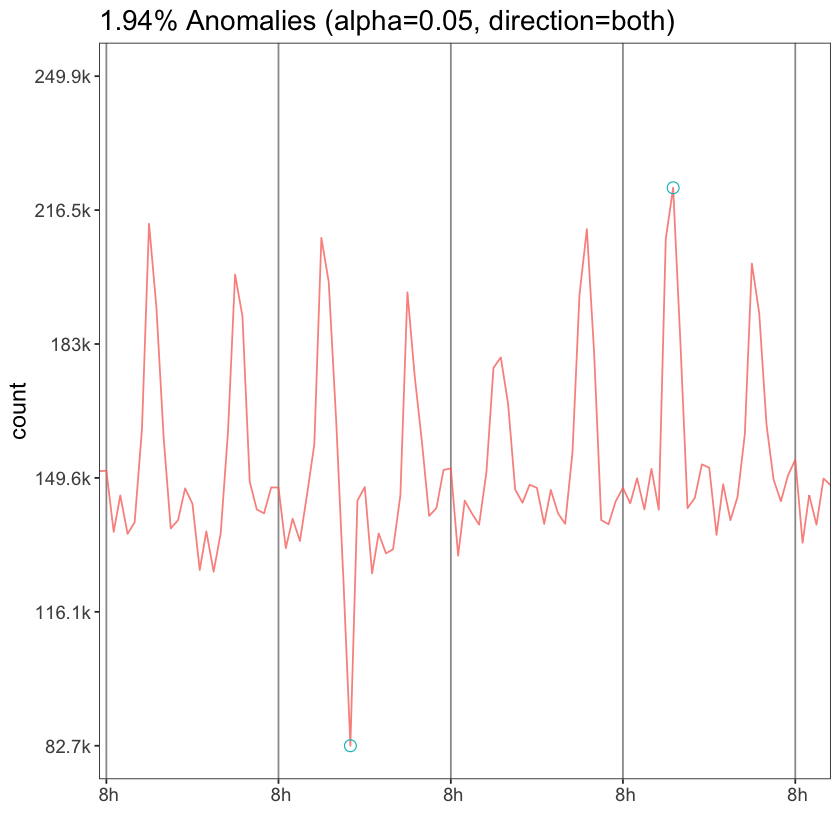

In [5]:
res = AnomalyDetectionTs(ts, max_anoms=0.02, direction='both', plot=TRUE)
res$plot

## Exploring the STL function from stats package

In [49]:
require(graphics)

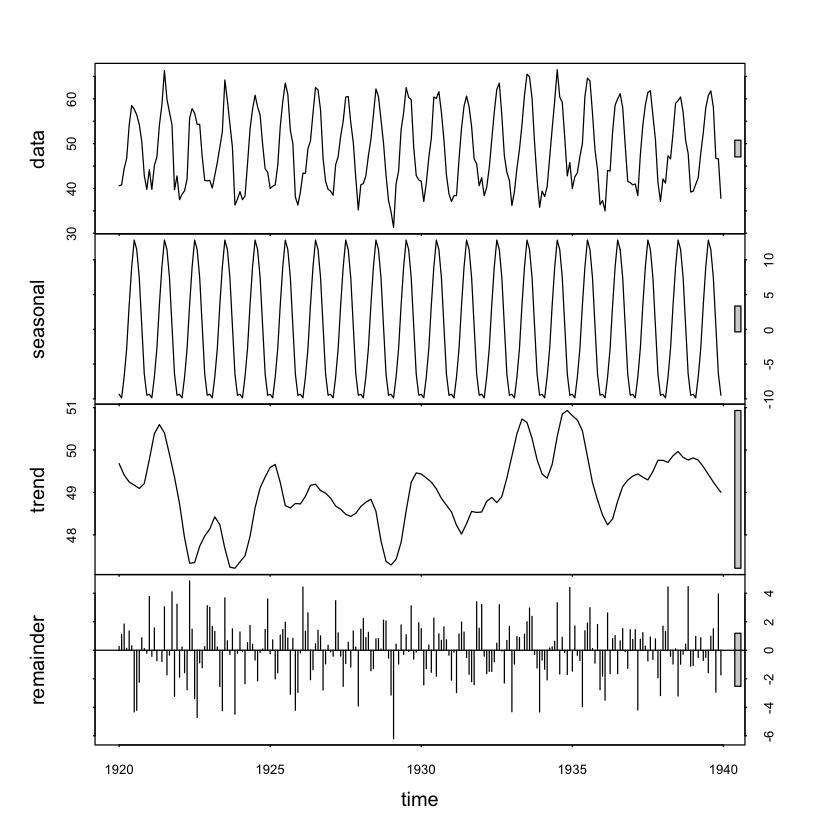

In [50]:
plot(stl(nottem, "per"))

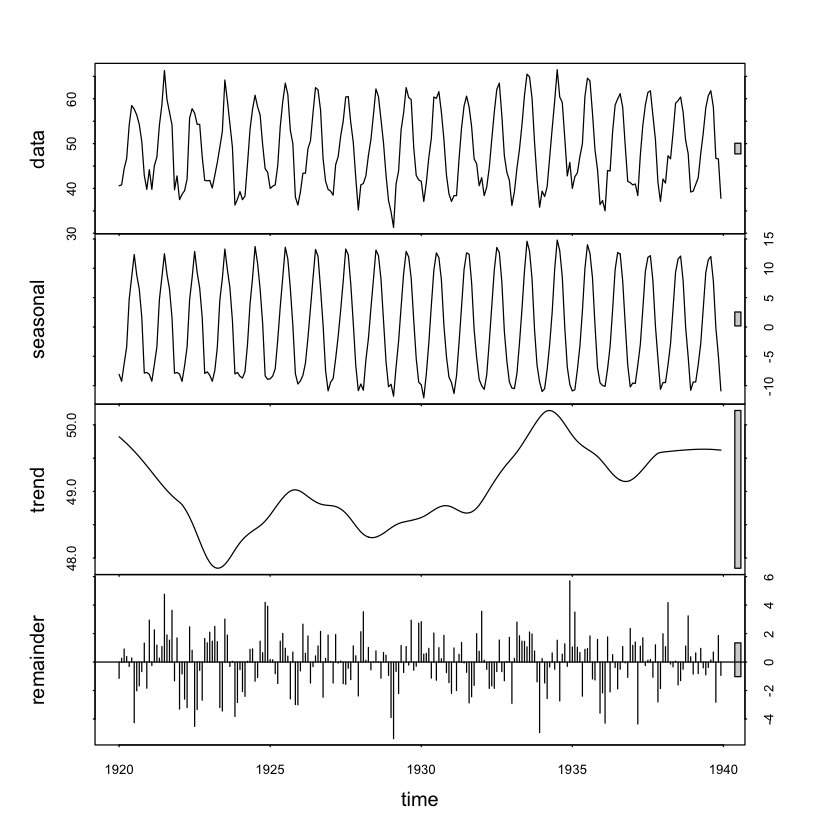

In [51]:
plot(stl(nottem, s.window = 7, t.window = 50, t.jump = 1))

## Exploring the Anomalize package

#### Example 1 - no missing data

In [17]:
ts =  select(filter(tb, Building_Meter == '165.0 - BLD 03_90327795'), 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, merge = TRUE) %>%
    anomalize(remainder) %>%
    time_recompose()

ts_anomalized %>% glimpse()

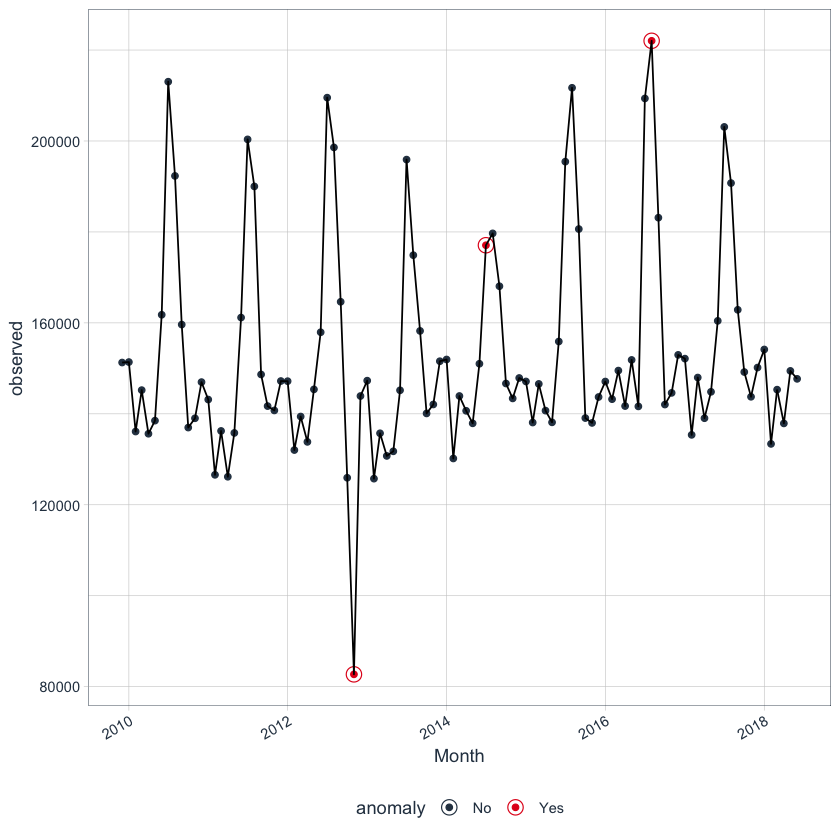

In [32]:
ts_anomalized %>%
    plot_anomalies(alpha_dots = 1) + geom_line()

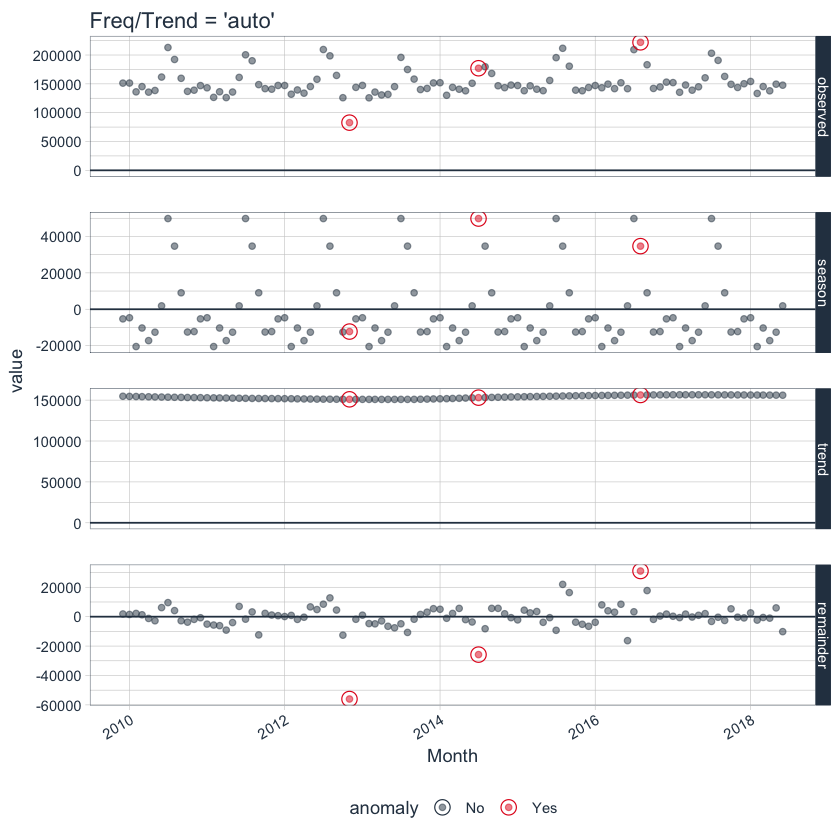

In [34]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Freq/Trend = 'auto'") 

p1

#### Example 2 - missing values in the middle

In [40]:
ts =  select(filter(tb, Building_Meter == '164.0 - BLD 01_96973681'), 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, merge = TRUE) %>%
    anomalize(remainder) %>%
    time_recompose()

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months


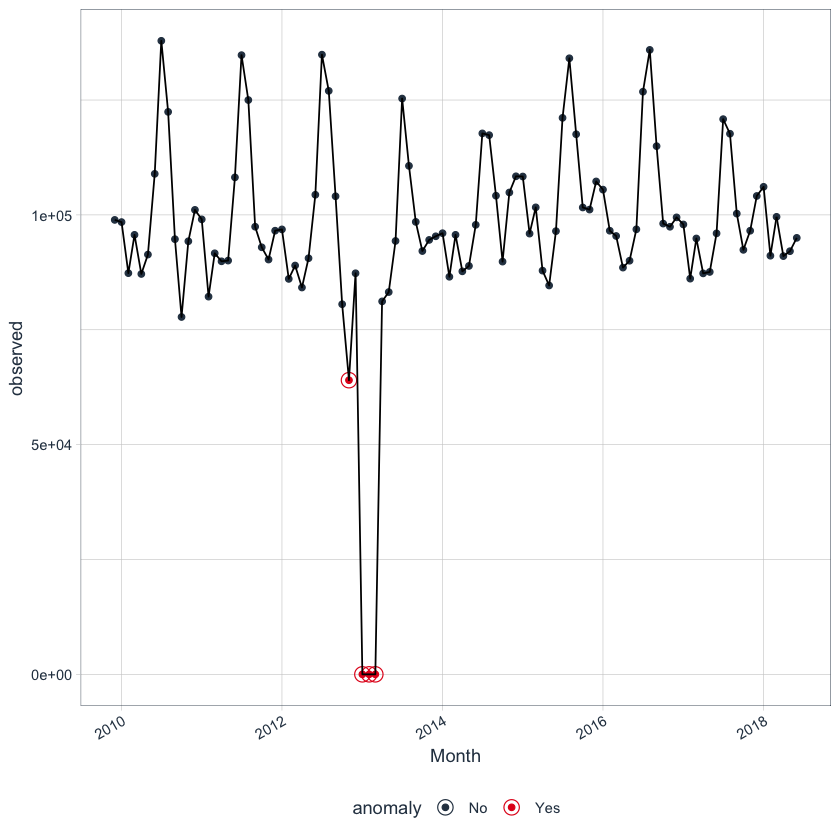

In [41]:
ts_anomalized %>%
    plot_anomalies(alpha_dots = 1) + geom_line()

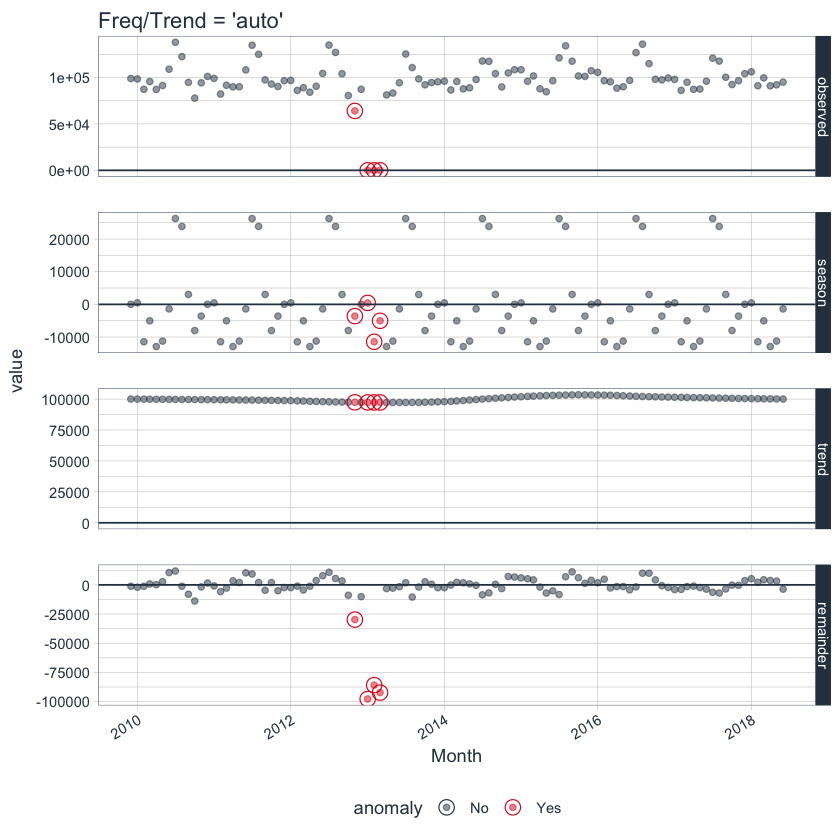

In [43]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Freq/Trend = 'auto'")

p1

#### Example 3 - only 12 points

In [44]:
ts =  select(filter(tb, Building_Meter == '1.0 - BLD 04_8638820'), 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, merge = TRUE) %>%
    anomalize(remainder) %>%
    time_recompose()

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 3 months
trend = 6 months


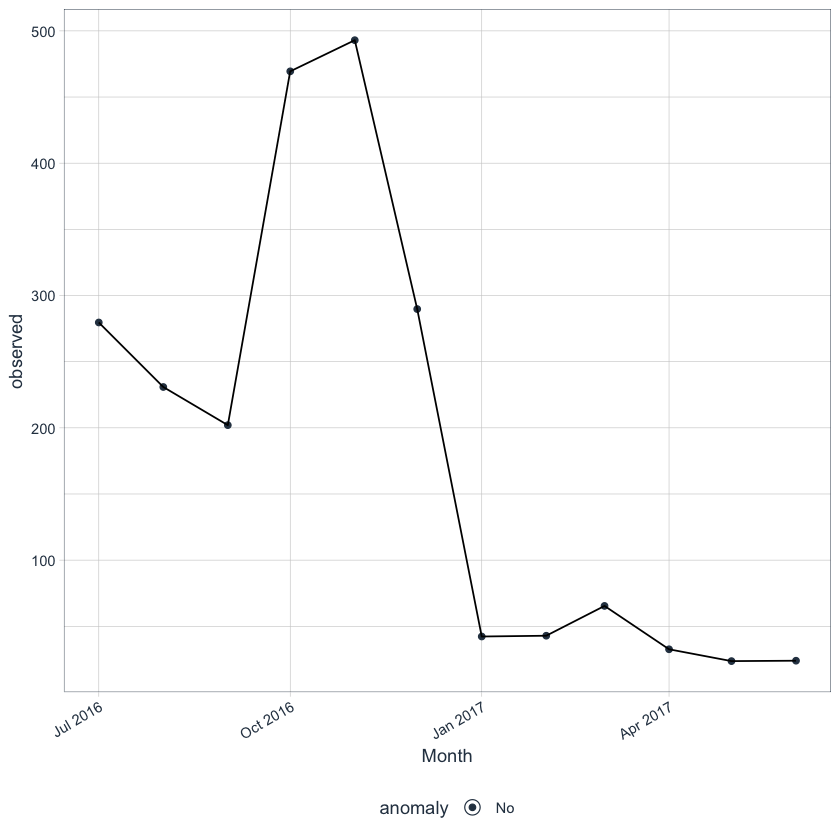

In [45]:
ts_anomalized %>%
    plot_anomalies(alpha_dots = 1) + geom_line()

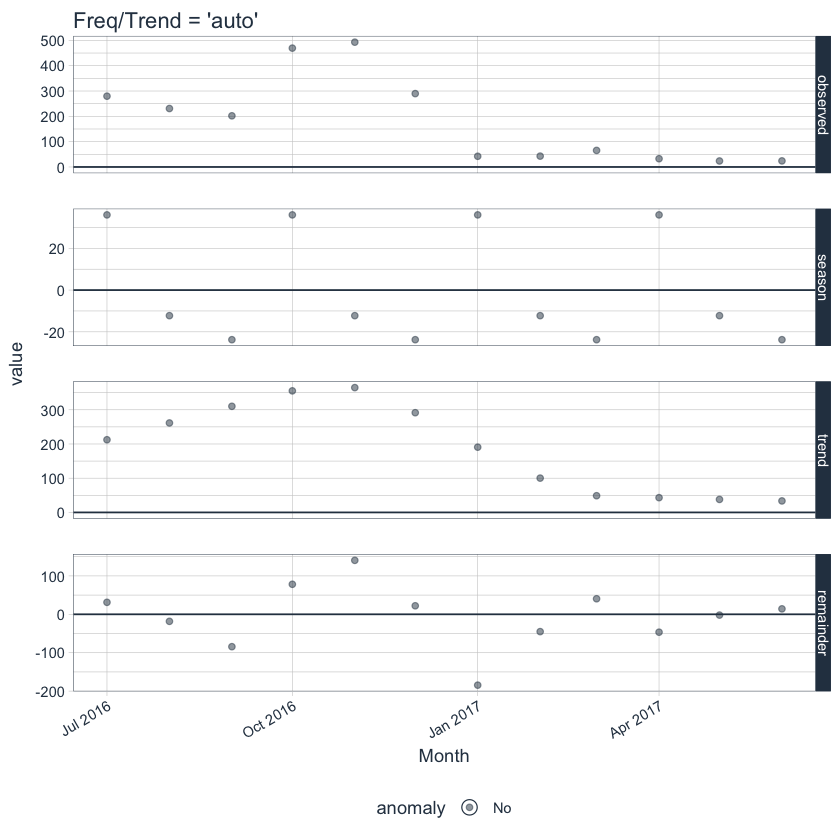

In [46]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Freq/Trend = 'auto'")

p1